<a href="https://colab.research.google.com/github/41815062/python/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C_%EB%85%B8%EC%9B%90%EA%B5%AC_%EC%98%A4%ED%94%BC%EC%8A%A4%ED%85%94%EC%A0%84%EC%9B%94%EC%84%B8_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#서울특별시 노원구 오피스텔 데이터 조회

##한글 처리

In [1]:
# 방법 1 )) 코랩 한글 깨짐 현상, 폰트 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,146 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and di

In [9]:
# 방법 2
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
# 방법 3
from matplotlib import font_manager , rc
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

# XML LOAD

In [1]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

url = 'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcOffiRent'
para = {'serviceKey': 'cyjQqZuuvujGyWNxhqSI5/z12wzZRGGnaNCfsc4S0rUMyWbqesfXWl5NUdqSNpVNHL3h1n48N/GrO0Ekzw1nBg==', 'LAWD_CD': '11350', 'DEAL_YMD': '202305'}

res = requests.get(url, params=para)
xml_data = res.content

# XML 파싱
root = ET.fromstring(xml_data)
items = root.findall('.//item')

# 데이터 추출 및 저장
data = []
for item in items:
    row = {}
    for child in item:
        row[child.tag] = child.text
    data.append(row)

df = pd.DataFrame(data)

# 데이터 출력
print(df)


   갱신요구권사용  건축년도 계약구분         계약기간     년               단지  법정동     보증금  시군구  \
0           2004   신규  23.05~24.05  2023              오피앙  상계동     500  노원구   
1           2003   신규  23.05~24.05  2023            마블러스1  상계동     500  노원구   
2           2005   갱신  23.05~24.05  2023           토마토파르코  상계동   1,000  노원구   
3           2005   신규  23.05~24.05  2023           토마토파르코  상계동   1,000  노원구   
4           2003   신규  23.05~24.05  2023            하이베라스  상계동   1,000  노원구   
5           2003   신규  23.06~24.06  2023            마블러스1  상계동   1,000  노원구   
6           2023   신규  23.05~25.05  2023  노원역 보미더클래스 오피스텔  상계동  23,000  노원구   
7           2003   신규  23.05~24.05  2023            하이베라스  상계동   1,000  노원구   
8           2005                    2023           토마토파르코  상계동   2,000  노원구   
9           2004   갱신  23.05~24.05  2023              오피앙  상계동   1,000  노원구   
10          2003   신규  23.05~24.05  2023            하이베라스  상계동  12,000  노원구   
11          2023   신규  23.05~24.05  2023  노원역 보미더클래스

## 엑셀 저장

In [4]:
df.to_excel('서울특별시 노원구 오피스텔 전월세 데이터.xlsx')

##Surface Officetel Data

<ipython-input-5-2271a9c87d4a>:38: UserWarning: The label '_nolegend_' of <matplotlib.patches.Rectangle object at 0x7fee8e067760> starts with '_'. It is thus excluded from the legend.
  ax.legend(lines, labels)
<ipython-input-5-2271a9c87d4a>:38: UserWarning: The label '_nolegend_' of <matplotlib.patches.Rectangle object at 0x7fee8e0c1b40> starts with '_'. It is thus excluded from the legend.
  ax.legend(lines, labels)


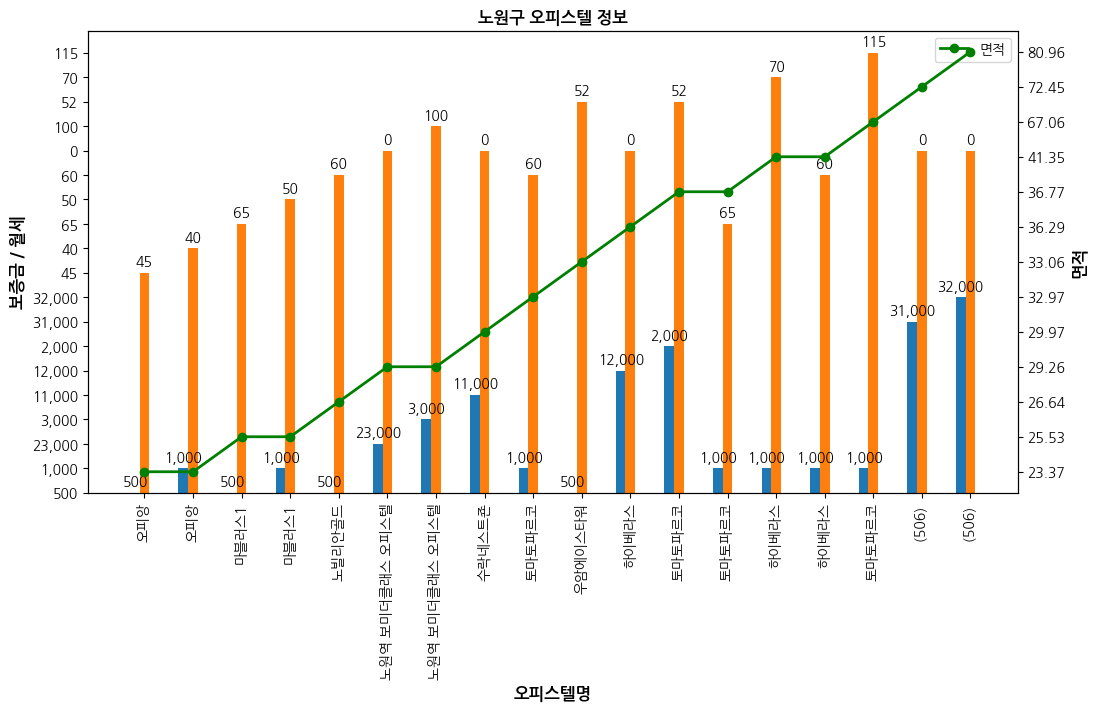

In [5]:
import numpy as np
import matplotlib.pyplot as plt

filtered_df = df[df['시군구'] == '노원구']
filtered_df = filtered_df.sort_values(by='전용면적')

x = np.arange(len(filtered_df))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, filtered_df['보증금'], width, label='보증금')
rects2 = ax.bar(x, filtered_df['월세'], width, label='월세')

ax.set_xlabel('오피스텔명', fontweight='bold', fontsize=12)
ax.set_ylabel('보증금 / 월세', fontweight='bold', fontsize=12)
ax.set_title('노원구 오피스텔 정보', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(filtered_df['단지'], rotation=90)

ax.legend()

# 오른쪽 y축 설정
ax2 = ax.twinx()
rects3 = ax2.plot(x, filtered_df['전용면적'], color='g', marker='o', linestyle='-', linewidth=2, label='면적')
ax2.set_ylabel('면적', fontweight='bold', fontsize=12)

# 수치 정렬
values = np.concatenate([filtered_df['보증금'], filtered_df['월세'], filtered_df['전용면적']])

# 라벨 추가
ax.bar_label(rects1, padding=3, label_type='edge', labels=filtered_df['보증금'].astype(str))
ax.bar_label(rects2, padding=3, label_type='edge', labels=filtered_df['월세'].astype(str))

# 범례 설정
lines = [rects1[0], rects2[0], rects3[0]]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels)

plt.show()

<ipython-input-10-d46d7c9adef8>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


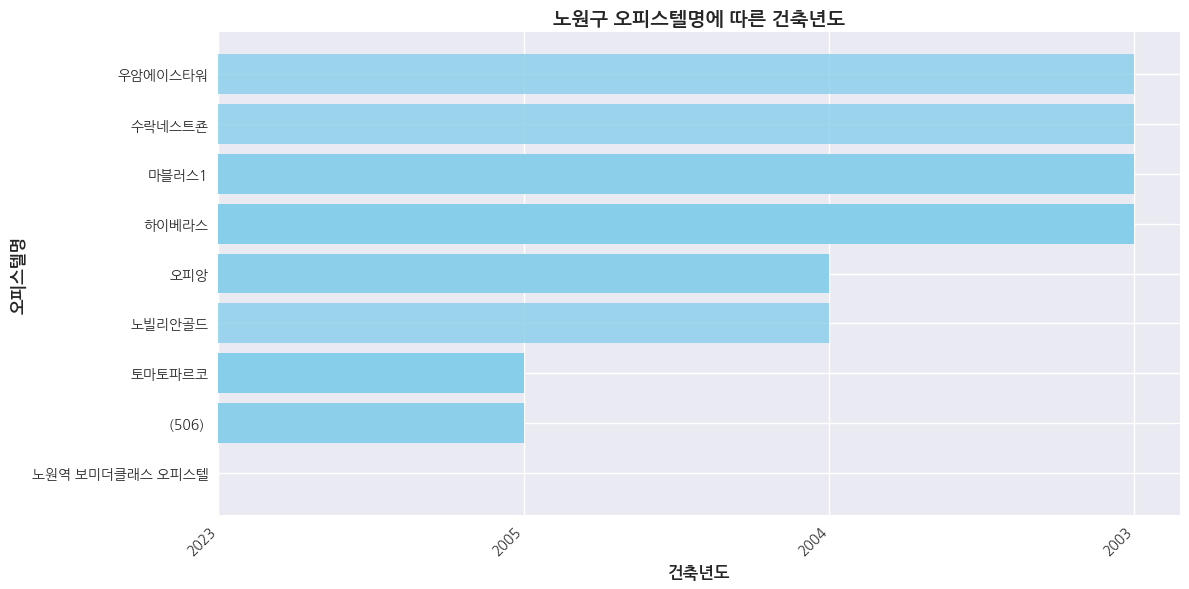

In [10]:
import matplotlib.pyplot as plt

filtered_df = df[df['시군구'] == '노원구']
filtered_df = filtered_df.sort_values(by='건축년도', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

x = filtered_df['단지']
y = filtered_df['건축년도'].astype(str)  # Convert to string

# 그래프 스타일 설정
plt.style.use('seaborn')

# 막대 그래프 그리기
ax.barh(x, y, color='skyblue', alpha=0.8)

# 축과 제목 설정
ax.set_xlabel('건축년도', fontweight='bold', fontsize=12)
ax.set_ylabel('오피스텔명', fontweight='bold', fontsize=12)
ax.set_title('노원구 오피스텔명에 따른 건축년도', fontweight='bold', fontsize=14)

# x축 눈금 라벨 설정
plt.xticks(rotation=45, ha='right')

# 그래프 여백 조정
plt.tight_layout()

plt.show()



In [17]:
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Create a geocoder instance with custom user_agent
geolocator = Nominatim(user_agent='my-custom-agent')

# Function to handle geocoding timeout and retry
def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

# Filter the dataframe for 노원구
filtered_df_nowon = df[df['시군구'] == '노원구']

# Create a map centered at 노원구's coordinates
location = do_geocode('노원구')
if location:
    map_nowon = folium.Map(location=[location.latitude, location.longitude], zoom_start=14)
else:
    map_nowon = folium.Map(location=[37.654191, 127.056790], zoom_start=14)  # Default coordinates

# Add markers for 노원구 오피스텔
for index, row in filtered_df_nowon.iterrows():
    address = row['지번'] + ', ' + row['법정동']
    location = do_geocode(address)
    if location:
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=f"단지: {row['단지']}<br>보증금: {row['보증금']}<br>월세: {row['월세']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_nowon)

# Display the map
map_nowon
